<a href="https://colab.research.google.com/github/Anjan-AI/TSAI-EVA5/blob/master/Session%2012%20-%20Object%20Localization%20YOLO%20(%20Part%201)/Session_12_Assignment_2_Findinng_K_value_imageset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Finding the best K using K-means and IOU method.

## Organisation of JSON File
keys :
   1. info - Genric Infoormation on the file like year, version, url, description
   2. images - this contains information of images
        * id - unique value
        * width - width of the image
        * height - height of the image
        * file_name - name of the file
        * license   - licence if any
        * date_captured - date when captured
   3.   annotation - information about annotation that is done manually in vgg annotator
        * id  - unique value
        * image_id - which is the id of images. By this we can join images and annottaion fields
        * segmentation- Co-Ordinates of the bbox. For rectangle there will be 8 coordinates(4 x,y groups) - top-left,top-right, bottom-left, bottom-right.
        * area- area of bounding box
        * bbox - 4 points. top-left x point,top-left y point, width of bbox, height of bbox 
        * iscrowd - NA
        * id - ID for each bounding box.
        * image_id - Image ID 
        * category_id - NA 
   4.   licence
   5.  Categories - This will have the information of the field we annotated.like class, type -- whatever fields we chose


In [1]:
%rm -rf TSAI-EVA5/

In [2]:
!git clone https://github.com/Anjan-AI/TSAI-EVA5.git

Cloning into 'TSAI-EVA5'...
remote: Enumerating objects: 239, done.
remote: Counting objects: 100% (239/239), done.
remote: Compressing objects: 100% (198/198), done.
remote: Total 846 (delta 78), reused 187 (delta 33), pack-reused 607
Receiving objects: 100% (846/846), 47.36 MiB | 17.31 MiB/s, done.
Resolving deltas: 100% (333/333), done.


In [165]:
import sys
sys.path.append('/content/TSAI-EVA5/Session 12 - Object Localization YOLO ( Part 1)/')

In [166]:
import json 
import pandas as pd

path = '/content/TSAI-EVA5/Session 12 - Object Localization YOLO ( Part 1)/Dataset/Images/ImagesSet1_coco.json' # path of the json file  
# Opening JSON file 
f = open(path) 
  
# returns JSON object as  

data = json.load(f) 
 

print(data.keys())
print('\n\n')
images = pd.DataFrame(data['images'], columns = data['images'][0].keys())
annotations = pd.DataFrame(data['annotations'], columns = data['annotations'][0].keys())
 
# Closing file 
f.close()
images.tail()

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories'])





,id,width,height,file_name,license,date_captured
65,66,626,417,66.jpg,0,
66,67,626,417,67.jpg,0,
67,68,724,483,68.jpg,0,
68,69,800,533,69.jpg,0,
69,70,640,336,70.jpg,0,


## display the data frames

In [167]:
annotations.tail()
#print(annotations.shape[0])

,segmentation,area,bbox,iscrowd,id,image_id,category_id
461,"[[85, 78, 119, 78, 119, 111, 85, 111]]",1122,"[85, 78, 34, 33]",0,462,70,None
462,"[[43, 122, 120, 122, 120, 285, 43, 285]]",12551,"[43, 122, 77, 163]",0,463,70,None
463,"[[124, 117, 278, 117, 278, 319, 124, 319]]",31108,"[124, 117, 154, 202]",0,464,70,None
464,"[[324, 115, 439, 115, 439, 261, 324, 261]]",16790,"[324, 115, 115, 146]",0,465,70,None
465,"[[451, 149, 591, 149, 591, 332, 451, 332]]",25620,"[451, 149, 140, 183]",0,466,70,None


## Preprocessing the data , remove unwanted cols 

In [168]:
bbwidth = []
bbheight = []
bbx = []
bby = []
bbox = list(annotations['bbox'])
for i in bbox:
    #print(i)
    bbx.append(i[0])
    bby.append(i[1])
    bbwidth.append(i[2])
    bbheight.append(i[3])
annotations['bbx'] = bbx
annotations['bby'] = bby
annotations['bbwidth'] = bbwidth
annotations['bbheight'] = bbheight
annotations = annotations.rename(columns={"id": "bbox_no"}) #changing the ID so that this kyworrd can be used for assignign the image ID
annotations = annotations.rename(columns={"image_id": "id"}) # changed Image_ID to ID as its the nmae used in Image dataframe and  will be used for merging. 
annotations = annotations.drop(["bbox","bbx","bby","bbox_no","category_id","segmentation","area","iscrowd"],axis =1)
annotations.tail()

,id,bbwidth,bbheight
461,70,34,33
462,70,77,163
463,70,154,202
464,70,115,146
465,70,140,183


In [169]:
images = images.drop(["license","date_captured"],axis = 1)
images.tail()


,id,width,height,file_name
65,66,626,417,66.jpg
66,67,626,417,67.jpg
67,68,724,483,68.jpg
68,69,800,533,69.jpg
69,70,640,336,70.jpg


### merging both the data frames.

In [170]:
list(images.columns)

['id', 'width', 'height', 'file_name']

In [171]:
list(annotations.columns)

['id', 'bbwidth', 'bbheight']

In [173]:

finalfile = pd.merge(images, annotations,on='id')

finalfile.tail()

,id,width,height,file_name,bbwidth,bbheight
461,70,640,336,70.jpg,34,33
462,70,640,336,70.jpg,77,163
463,70,640,336,70.jpg,154,202
464,70,640,336,70.jpg,115,146
465,70,640,336,70.jpg,140,183


## Normalize the Bounding Box values

In [174]:
finalfile['bbwidth'] = finalfile['bbwidth'].div(finalfile['width'])
finalfile['bbheight'] = finalfile['bbheight'].div(finalfile['height'])
finalfile['height'] = finalfile['height'].div(finalfile['height'])
finalfile['width'] = finalfile['width'].div(finalfile['width'])

finalfile.tail()

,id,width,height,file_name,bbwidth,bbheight
461,70,1.0,1.0,70.jpg,0.053125,0.098214
462,70,1.0,1.0,70.jpg,0.120313,0.485119
463,70,1.0,1.0,70.jpg,0.240625,0.601190
464,70,1.0,1.0,70.jpg,0.179688,0.434524
465,70,1.0,1.0,70.jpg,0.218750,0.544643


In [176]:
table_for_kmeans = finalfile.drop(["width","height","file_name","id"],axis = 1)
table_for_kmeans.head()

,bbwidth,bbheight
0,0.244361,0.222222
1,0.436090,0.608466
2,0.080078,0.081818
3,0.085938,0.084848
4,0.056641,0.072727


In [177]:
table_for_kmeans.tail()

,bbwidth,bbheight
461,0.053125,0.098214
462,0.120313,0.485119
463,0.240625,0.601190
464,0.179688,0.434524
465,0.218750,0.544643


## Plotting the Nomralized values 

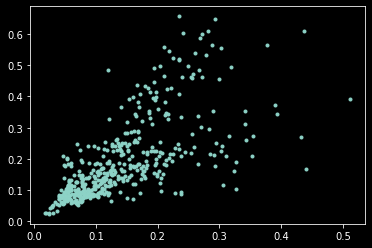

In [178]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")
plt.plot(table_for_kmeans['bbwidth'],table_for_kmeans['bbheight'],'.')

### Apply Elbow method to find out K

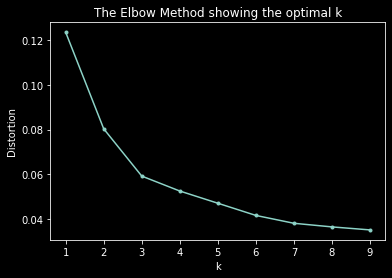

In [179]:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt



# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(table_for_kmeans)
    kmeanModel.fit(table_for_kmeans)
    distortions.append(sum(np.min(cdist(table_for_kmeans, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) /table_for_kmeans.shape[0])

# Plot the elbow
plt.style.use("dark_background")
plt.plot(K, distortions, '.-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


# Iou Method to find out K
###IOU(Intersection over union) = intersected area of bbox and anchor box/ Union area of bbox and anchor box

###bw = bounding box width, bh - bounding box height, aw - anchor box width, ah - anchor box height

###IOU = min(bw,aw) min(bh, ah)/bwbh + awah - min(bw,aw) min(bh, ah)

###mean IOU = sum(IOU)/len(IOU)


In [180]:
height = list(table_for_kmeans['bbheight'])
width = list(table_for_kmeans['bbwidth'])
ks = range(1,10)
meaniou = []
for k in ks:
    cl = KMeans(n_clusters=k)
    cl.fit(table_for_kmeans)
    cx = []
    cy = []
    mapcx  = {}
    mapcy = {}
    iou = []
    for i in range(len(width)):
        
        l = cl.labels_[i]
        cx.append(cl.cluster_centers_[l][0])
        cy.append(cl.cluster_centers_[l][1])
        iou.append(min(width[i] ,cx[i])* min(height[i] , cy[i])/(height[i]*width[i]+ cx[i]*cy[i]- min(width[i] , cx[i])* min(height[i] ,cy[i])))
    meaniou.append(sum(iou)/len(width))

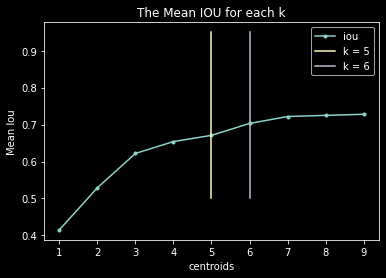

In [182]:
plt.style.use("dark_background")
plt.plot(range(1,10),meaniou,'.-',label = "iou")
plt.plot([5,5],[0.5,0.95],label = "k = 5")
plt.plot([6,6],[0.5,0.95],label = "k = 6")
plt.xlabel('centroids')
plt.ylabel('Mean Iou')
plt.title('The Mean IOU for each k')
plt.legend()
plt.show()

In [183]:
meaniou[3],meaniou[4],meaniou[5],meaniou[6]

(0.6540287273186097,
 0.6709012681295348,
 0.7030518780771059,
 0.7218901810933637)

K =6 from elbow method and K =5 from the IOU method.

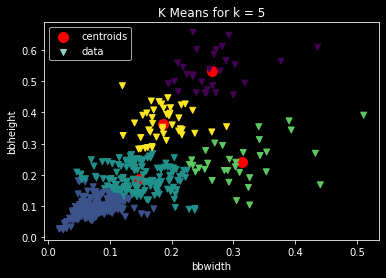

In [184]:
import numpy as np
array_points = np.array(table_for_kmeans)
cl3 = KMeans(5)
cl3.fit(array_points)

plt.scatter(cl3.cluster_centers_[:,0] ,cl3.cluster_centers_[:,1], color='red',s = 100,marker = 'o', label='centroids')
plt.scatter(list(table_for_kmeans['bbwidth']), list(table_for_kmeans['bbheight']), marker="v",c=list(cl3.labels_.astype(float)), label = "data")
plt.legend()
plt.xlabel('bbwidth')
plt.ylabel('bbheight')
plt.title('K Means for k = 5')
plt.legend()
plt.show()

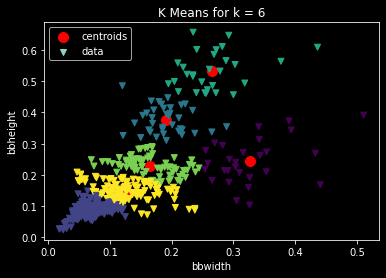

In [185]:
import numpy as np
array_points = np.array(table_for_kmeans)
cl3 = KMeans(6)
cl3.fit(array_points)

plt.scatter(cl3.cluster_centers_[:,0] ,cl3.cluster_centers_[:,1], color='red',s = 100,marker = 'o', label='centroids')
plt.scatter(list(table_for_kmeans['bbwidth']), list(table_for_kmeans['bbheight']), marker="v",c=list(cl3.labels_.astype(float)), label = "data")
plt.legend()
plt.xlabel('bbwidth')
plt.ylabel('bbheight')
plt.title('K Means for k = 6')
plt.legend()
plt.show()

### by looking at the plot K=6 and K =5 looks almost same, so k=5 would be a good no.